** Question 1 **

The CLAMS.CSV file contains a random sample of 996 vehicle insurance policies for the period 2004-2005. The file variables are in the following order: (i) Valuev (vehicle value in 10000 Australian dollars), (ii) Expos (vehicle exposure), (iii) nsinisters (number of claims in the period), (IV) CSINS (Total Cost of Sinister in Australian Dollars), (V) Typev (VEHICLE TYPE in 11 categories) (VII) Sexoc (main driver sex), (VIII) AREAC (area of ​​residence of the main driver) and (IX) agec (main driver age in 6 categories).

A) Make a descriptive analysis of the data and try to group in a smaller number of categories some categorical variables. Consider as a variable Response (target) cmsinisters = CSINSTRINES/NSINS.

B) What is the relationship of the variable cmsinstros with sex? Is any sex higher on average? Can you defend your argument using the techniques you studied?

C) Study cmsinisters in relation to the age of the driver. Does your impression change if we add the sex variable?

D) Is there a clear ratio of increased risk of risk in relation to the value of the vehicle?

E) Make a sample -simple (200) -stratified (100 male and 100 female)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind

In [2]:
df = pd.read_csv("claims.csv", delimiter=";", decimal=",")
df

,valorv,expos,nsinistros,csinistros,tipov,idadev,sexoc,areac,idadec
0,1.66,0.484600,1,669.509999,SEDAN,3,M,B,6
1,1.51,0.993840,1,806.609999,SEDAN,3,F,F,4
2,0.76,0.539357,1,401.805451,HBACK,3,M,C,4
3,1.89,0.654346,2,1811.709997,STNWG,3,M,F,2
4,4.06,0.851472,1,5434.439987,STNWG,2,M,F,3
...,...,...,...,...,...,...,...,...,...
991,2.02,0.859685,1,3723.636360,HDTOP,3,M,F,3
992,1.15,0.229979,1,20657.129944,STNWG,4,M,E,2
993,4.49,0.375086,1,558.900000,STNWG,1,M,C,5
994,0.92,0.744695,1,353.770000,HBACK,3,F,A,4


** a) ** Make a descriptive analysis of the data and try to group in a smaller number of categories some categorical variables. Consider as a variable Response (target) cmsinisters = CSINSTRINES/NSINS.

In [3]:
# Variable Response CMSINSTROS
df['cmsinistros'] = df['csinistros'] / df['nsinistros']

In [4]:
# Descriptive Analysis
print("Estatísticas Descritivas das Variáveis Numéricas:")
df[['valorv', 'expos', 'nsinistros', 'csinistros', 'cmsinistros']].describe()

Estatísticas Descritivas das Variáveis Numéricas:


,valorv,expos,nsinistros,csinistros,cmsinistros
count,996.000000,996.000000,996.000000,996.000000,996.000000
mean,1.858742,0.614804,1.061245,1837.106591,1731.349425
std,1.086844,0.254148,0.267623,3112.527127,2952.122267
min,0.000000,0.005476,1.000000,200.000000,200.000000
25%,1.130000,0.443532,1.000000,353.770000,353.770000
50%,1.600000,0.616016,1.000000,697.440000,643.585000
75%,2.350000,0.848734,1.000000,1866.389999,1787.602498
max,7.199000,0.999316,4.000000,26507.294983,26507.294983


In [5]:
cmsinistros_masculino = df[df['sexoc'] == 'Masculino']['cmsinistros']
cmsinistros_feminino = df[df['sexoc'] == 'Feminino']['cmsinistros']

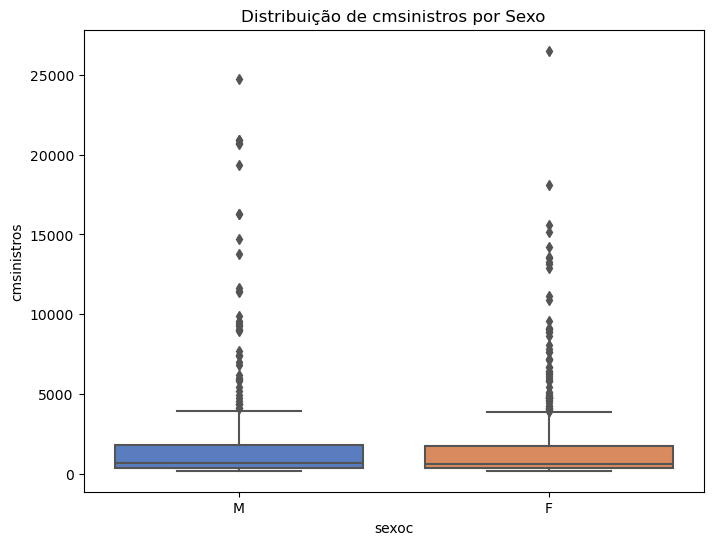

In [6]:
# Visualization
plt.figure(figsize=(8, 6))
sns.boxplot(x='sexoc', y='cmsinistros', data=df, palette='muted')
plt.title("Distribuição de cmsinistros por Sexo")
plt.show()

** b) ** What is the ratio of the variable cmsinisters with sex? Is any sex higher on average? Can you defend your argument using the techniques you studied?

In [7]:
cmsinistros_means_by_gender = df.groupby('sexoc')['cmsinistros'].mean()
print("Médias de cmsinistros por sexo:")
cmsinistros_means_by_gender

Médias de cmsinistros por sexo:


sexoc
F    1643.213070
M    1847.837336
Name: cmsinistros, dtype: float64

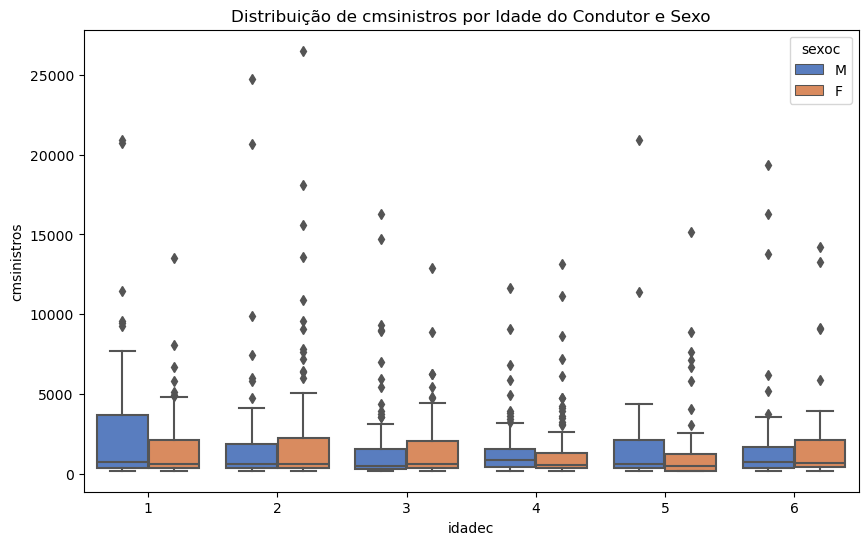

In [8]:
plt.figure(figsize=(10, 6)) 
sns.boxplot(x='idadec', y='cmsinistros', hue='sexoc', data=df, palette='muted')
plt.title("Distribuição de cmsinistros por Idade do Condutor e Sexo")
plt.show()

** c) ** Study cmsinisters in relation to the age of the driver. Does your impression change if we add the sex variable?

In [9]:
# Grouping and calculation of the average of CMSinisters by age group
cmsinistros_por_idade = df.groupby('idadec')['cmsinistros'].mean()
print("Média de cmsinistros por idade:")
print(cmsinistros_por_idade)

Média de cmsinistros por idade:
idadec
1    2269.896792
2    2038.275348
3    1522.014118
4    1354.427201
5    1500.364602
6    2218.380752
Name: cmsinistros, dtype: float64


In [10]:
# Grouping by age and gender, and calculation of the average of cmsinisters
cmsinistros_por_idade_sexo = df.groupby(['idadec', 'sexoc'])['cmsinistros'].mean()
print("\nMédia de cmsinistros por idade e sexo:")
cmsinistros_por_idade_sexo


Média de cmsinistros por idade e sexo:


idadec  sexoc
1       F        1703.457561
        M        3088.086792
2       F        2161.324213
        M        1854.443310
3       F        1420.526888
        M        1660.891381
4       F        1290.286782
        M        1444.223787
5       F        1425.187239
        M        1581.152216
6       F        2187.970886
        M        2248.099485
Name: cmsinistros, dtype: float64

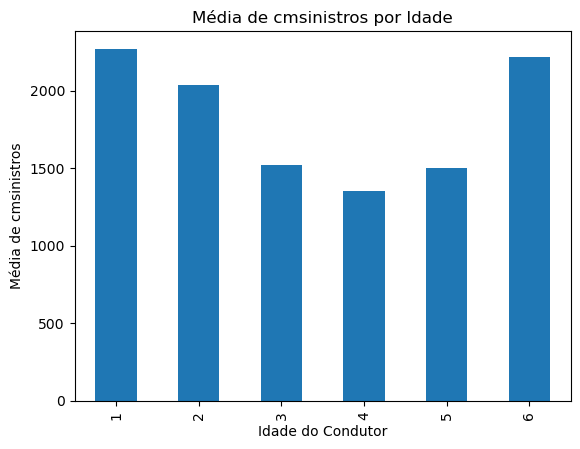

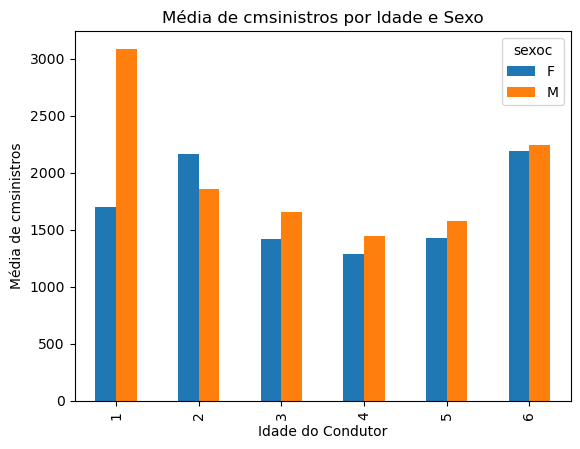

In [11]:
# Chart can compare averages by age and gender
cmsinistros_por_idade.plot(kind='bar', title='Média de cmsinistros por Idade', ylabel='Média de cmsinistros', xlabel='Idade do Condutor')
cmsinistros_por_idade_sexo.unstack().plot(kind='bar', title='Média de cmsinistros por Idade e Sexo', ylabel='Média de cmsinistros', xlabel='Idade do Condutor')
plt.show()

** d) ** Is there a clear ratio of increased risk of risk in relation to vehicle value?

In [12]:
## Correlation between and cmsinstros x valuev

data_corr_sin = df['cmsinistros'].corr(df['valorv'])
print(f"Correlação entre cmsinistros e valorv: {data_corr_sin}")

Correlação entre cmsinistros e valorv: -0.030906830909246955


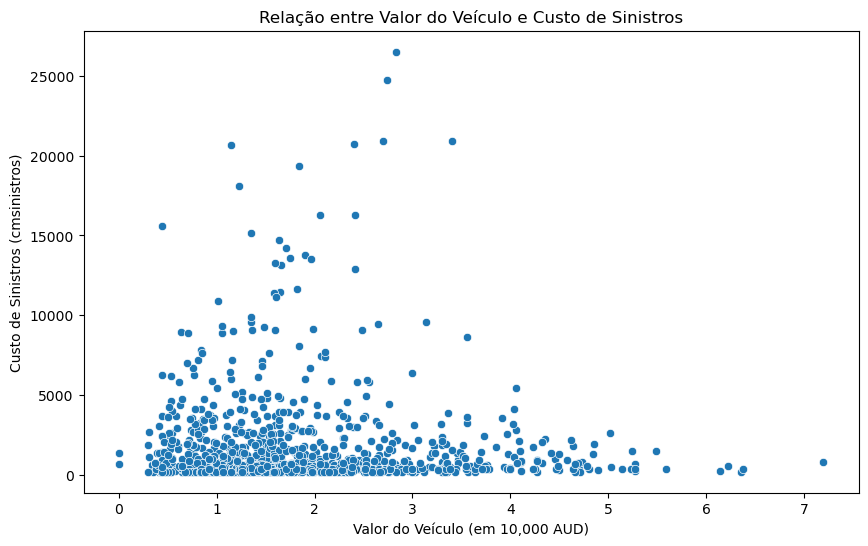

In [13]:
# Graph shows the dispersion to see a relationship between cmsinstros and valuev

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='valorv', y='cmsinistros')
plt.title('Relação entre Valor do Veículo e Custo de Sinistros')
plt.xlabel('Valor do Veículo (em 10,000 AUD)')
plt.ylabel('Custo de Sinistros (cmsinistros)')
plt.show()

** e) ** Make a sample -simple (200) -stratified (100 male and 100 female)

In [14]:
sample_1 = df.sample(n=200, random_state=42)
sample_1

,valorv,expos,nsinistros,csinistros,tipov,idadev,sexoc,areac,idadec,cmsinistros
832,0.95,0.777550,1,389.950000,HBACK,3,F,F,1,389.950000
970,1.34,0.555784,1,953.849998,SEDAN,3,M,B,6,953.849998
96,2.20,0.799452,1,1244.160000,HBACK,1,F,B,6,1244.160000
587,0.97,0.873374,1,3563.909996,HBACK,3,F,B,6,3563.909996
450,1.89,0.807666,1,243.550000,SEDAN,2,F,C,4,243.550000
...,...,...,...,...,...,...,...,...,...,...
490,2.99,0.588638,1,200.000000,HDTOP,1,F,A,3,200.000000
855,2.61,0.539357,1,848.539999,SEDAN,1,M,A,4,848.539999
65,0.46,0.903491,1,265.000000,SEDAN,4,M,B,3,265.000000
141,3.18,0.388775,2,2212.689998,STNWG,2,F,A,5,1106.344999


In [15]:
# Stratified Sample - 100 Men 100 Women
amostra_estratificada = df.groupby('sexoc', group_keys=False).apply(lambda x: x.sample(min(len(x), 100), random_state=42))
print("\nAmostra Estratificada (100 Masculino, 100 Feminino)")
amostra_estratificada.head()


Amostra Estratificada (100 Masculino, 100 Feminino)


,valorv,expos,nsinistros,csinistros,tipov,idadev,sexoc,areac,idadec,cmsinistros
945,4.23,0.481862,1,389.950000,STNWG,2,F,D,2,389.950000
916,2.37,0.561259,1,200.000000,HDTOP,2,F,C,2,200.000000
417,2.59,0.991102,1,353.770000,SEDAN,1,F,D,2,353.770000
918,1.95,0.955510,1,6675.579987,UTE,3,F,D,5,6675.579987
862,0.50,0.361396,1,200.000000,SEDAN,4,F,B,4,200.000000


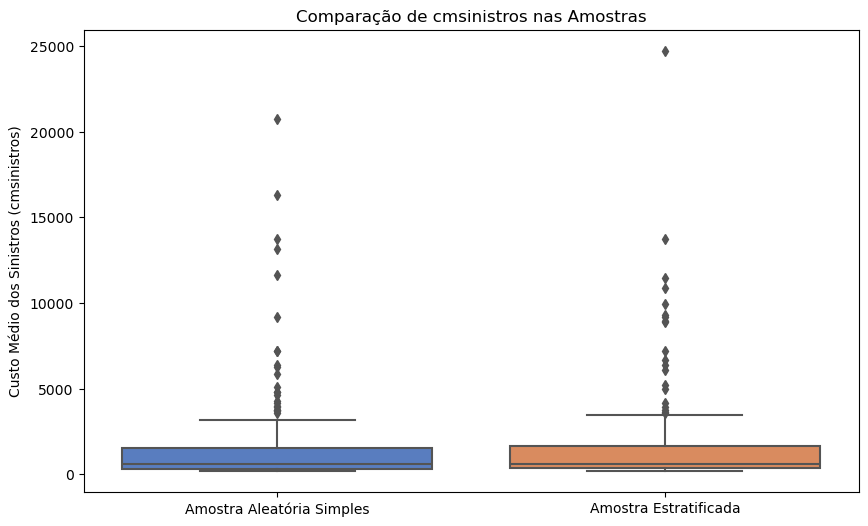

In [16]:
# Boxplots to compare cmsinister distributions in the samples
plt.figure(figsize=(10, 6))
sns.boxplot(data=[sample_1['cmsinistros'], amostra_estratificada['cmsinistros']], palette='muted')
plt.xticks([0, 1], ['Amostra Aleatória Simples', 'Amostra Estratificada'])
plt.title("Comparação de cmsinistros nas Amostras")
plt.ylabel("Custo Médio dos Sinistros (cmsinistros)")
plt.show()

** Question 2 **

For this exercise will be used the data regarding a case-control study conducted in the Anatomy and Pathology sector of Heliópolis Hospital in São Paulo, from 1970 to 1982 (CANC3.CSV). A total of 175 patients with infectious pulmonary process treated at the hospital in the period above was classified according to the following variables: Type, Tumor Type (1: Malignant, 0: benign); Age, age in years; Sex (0: male, 1: feminine); HL, intensity of the historical-lymphocyte cell (1: absent, 2: discreet, 3: moderate, 4: intense) and FF, fibros-froux cell intensity (1: absent, 2: discreet, 3: moderate, 4: intense).

In [17]:
df = pd.read_csv("canc3.csv",sep=";")
df

,tipo,idade,sexo,hl,ff
0,0,26,1,3,1
1,0,21,1,3,1
2,0,45,1,3,3
3,0,19,2,4,3
4,0,16,2,4,3
...,...,...,...,...,...
170,1,75,2,1,2
171,1,55,2,3,3
172,1,50,2,2,1
173,1,57,2,3,1


** a) ** Make a descriptive analysis of the problem variables.

In [18]:
# Malignant and benign tumors
df['tipo'].value_counts()

tipo
0    104
1     71
Name: count, dtype: int64

In [19]:
# Sex
df['sexo'].value_counts()

sexo
1    126
2     49
Name: count, dtype: int64

In [20]:
# Historical-Lymphocyte
df['hl'].value_counts()

hl
3    86
2    67
4    14
1     8
Name: count, dtype: int64

In [21]:
#Frouxa fibrosis
df['ff'].value_counts()

ff
1    76
3    49
2    46
4     4
Name: count, dtype: int64

In [22]:
# Numerical variables
print("\nEstatísticas descritivas para idade:")
df['idade'].describe()


Estatísticas descritivas para idade:


count    175.000000
mean      47.702857
std       18.206439
min       15.000000
25%       30.000000
50%       50.000000
75%       61.000000
max       87.000000
Name: idade, dtype: float64

c:\Users\rafae\anaconda3_2024\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


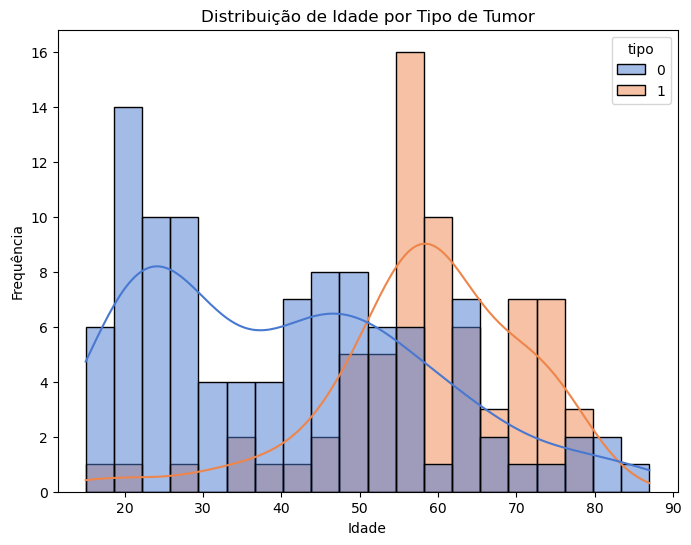

In [23]:
# ** Age distribution by tumor type **
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='idade', hue='tipo', kde=True, bins=20, palette='muted')
plt.title('Distribuição de Idade por Tipo de Tumor')
plt.xlabel('Idade')
plt.ylabel('Frequência')
plt.show()


** b) ** Is there any variable that draws attention to the tumor type? (Tip: cross the variables in relation to the tumor type).

In [24]:
# Type of tumor x sex
sexo_tumor = pd.crosstab(df['tipo'], df['sexo'])
print("\nTabela cruzada - Tipo de Tumor x Sexo:")
sexo_tumor


Tabela cruzada - Tipo de Tumor x Sexo:


sexo,1,2
tipo,,
0,78,26
1,48,23


In [25]:
from scipy.stats import ttest_ind, chi2_contingency

# Qui-square test for tumor type x sex
chi2, p, dof, expected = chi2_contingency(sexo_tumor)
print("\nTeste Qui-Quadrado - Tipo de Tumor x Sexo:")
print(f"Qui-Quadrado: {chi2}, p-valor: {p}")


Teste Qui-Quadrado - Tipo de Tumor x Sexo:
Qui-Quadrado: 0.8069719062236673, p-valor: 0.3690170246503912


In [26]:
# Type of tumor x hl
hl_tumor = pd.crosstab(df['tipo'], df['hl'])
print("\nTabela cruzada - Tipo de Tumor x HL:")
print(hl_tumor)


Tabela cruzada - Tipo de Tumor x HL:
hl    1   2   3   4
tipo               
0     2  24  65  13
1     6  43  21   1


In [27]:
# Qui-square test for tumor type x hl
chi2, p, dof, expected = chi2_contingency(hl_tumor)
print("\nTeste Qui-Quadrado - Tipo de Tumor x HL:")
print(f"Qui-Quadrado: {chi2}, p-valor: {p}")


Teste Qui-Quadrado - Tipo de Tumor x HL:
Qui-Quadrado: 35.21475260730537, p-valor: 1.097391987802205e-07


In [28]:
# Type of tumor x ff
ff_tumor = pd.crosstab(df['tipo'], df['ff'])
print("\nTabela cruzada - Tipo de Tumor x FF:")
print(ff_tumor)


Tabela cruzada - Tipo de Tumor x FF:
ff     1   2   3  4
tipo               
0     31  32  39  2
1     45  14  10  2


In [29]:
# Qui-Qui-square tumor type x ff test
chi2, p, dof, expected = chi2_contingency(ff_tumor)
print("\nTeste Qui-Quadrado - Tipo de Tumor x FF:")
print(f"Qui-Quadrado: {chi2}, p-valor: {p}")


Teste Qui-Quadrado - Tipo de Tumor x FF:
Qui-Quadrado: 21.32099082126981, p-valor: 9.029164440322077e-05


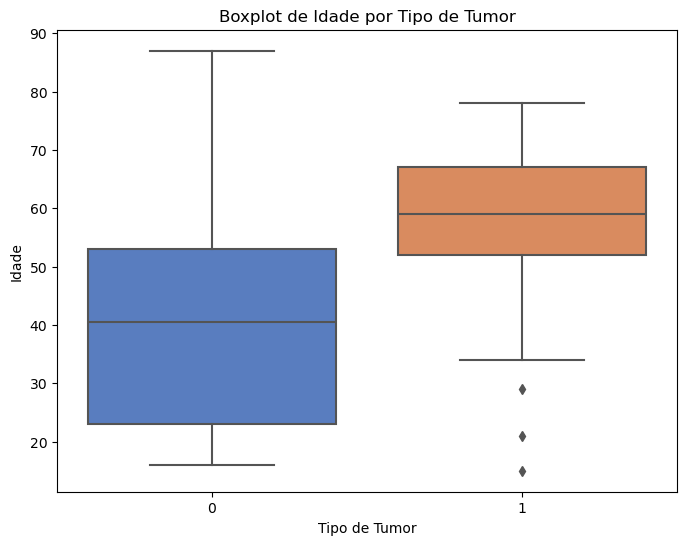


Teste t para Idade entre Tumores Malignos e Benignos:
Estatística t: 7.743136029857681, p-valor: 7.826319968665882e-13


In [30]:
# Age by tumor type
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='tipo', y='idade', palette='muted')
plt.title('Boxplot de Idade por Tipo de Tumor')
plt.xlabel('Tipo de Tumor')
plt.ylabel('Idade')
plt.show()

# Test t for age x tumor type
idade_maligno = df[df['tipo'] == 1]['idade']
idade_benigno = df[df['tipo'] == 0]['idade']

t_stat, p_val = ttest_ind(idade_maligno, idade_benigno, equal_var=False)
print("\nTeste t para Idade entre Tumores Malignos e Benignos:")
print(f"Estatística t: {t_stat}, p-valor: {p_val}")

** Question 3 **

Each air sample has a 10% chance of containing a certain rare molecule. Consider that the samples are independent regarding the presence of the rare molecule. Find the probability that in 18 samples:

** a) ** Exactly 2 contain the rare molecule.

In [31]:
from scipy.stats import binom

In [32]:
a = binom.pmf(2, 18, 0.1)
a

0.2835120888943317

** b) ** at least 4 samples contain the rare molecule.

In [33]:
b = 1 - binom.cdf(3, 18, 0.1)
b

0.09819684142543739

** c) ** of 3 to 7 samples contain the rare molecule.

In [34]:
c = binom.pmf(3, 18, 0.1) + binom.pmf(4, 18, 0.1) + binom.pmf(5, 18, 0.1) + binom.pmf(6, 18, 0.1) + binom.pmf(7, 18, 0.1)
c

0.26603054787476715

** d) ** The average number and the variance of rare molecules.

In [35]:
n = 18
p = 0.1
q = 0.9

media = n * p
media

1.8

In [36]:
variancia = n * p * q
variancia 

1.62